# Encoding and Inverse Transform

Inverting encoding means converting the encoded labels back to their original form. This is often necessary after making predictions in a machine learning model so that you can interpret the results in a human-readable format.
Inverse encoding is the process of converting the encoded data back to its original form. This is done by using the inverse_transform() method. This method is available for the following encoders:

    LabelEncoder
    OrdinalEncoder
    OneHotEncoder


In [8]:
# import libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [9]:
# load the data
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# impute missing values for age, embarked, embark_town and deck
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
# drop deck column
df.drop('deck', axis=1, inplace=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_18264\741017295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_18264\741017295.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [11]:
# encode all categorical variables and object variables

le_sex = LabelEncoder()
le_embarked = LabelEncoder()
le_class = LabelEncoder()
le_who = LabelEncoder()
le_embark_town = LabelEncoder()
le_alive = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['embarked'] = le_embarked.fit_transform(df['embarked'])
df['class'] = le_class.fit_transform(df['class'])
df['who'] = le_who.fit_transform(df['who'])
df['embark_town'] = le_embark_town.fit_transform(df['embark_town'])
df['alive'] = le_alive.fit_transform(df['alive'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [12]:
# inverse transform the data

df['sex'] = le_sex.inverse_transform(df['sex'])
df['embarked'] = le_embarked.inverse_transform(df['embarked'])
df['class'] = le_class.inverse_transform(df['class'])
df['who'] = le_who.inverse_transform(df['who'])
df['embark_town'] = le_embark_town.inverse_transform(df['embark_town'])
df['alive'] = le_alive.inverse_transform(df['alive'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [13]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select categorical columns for encoding
categorical_columns = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive']

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Encode all categorical columns
df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])
print("Data After Ordinal Encoding:")
print(df[categorical_columns].head())

# Inverse transform to decode
df[categorical_columns] = ordinal_encoder.inverse_transform(df[categorical_columns])
print("\nData After Inverse Transformation (Decoding):")
print(df[categorical_columns].head())


Data After Ordinal Encoding:
   sex  embarked  class  who  embark_town  alive
0  1.0       2.0    2.0  1.0          2.0    0.0
1  0.0       0.0    0.0  2.0          0.0    1.0
2  0.0       2.0    2.0  2.0          2.0    1.0
3  0.0       2.0    0.0  2.0          2.0    1.0
4  1.0       2.0    2.0  1.0          2.0    0.0

Data After Inverse Transformation (Decoding):
      sex embarked  class    who  embark_town alive
0    male        S  Third    man  Southampton    no
1  female        C  First  woman    Cherbourg   yes
2  female        S  Third  woman  Southampton   yes
3  female        S  First  woman  Southampton   yes
4    male        S  Third    man  Southampton    no


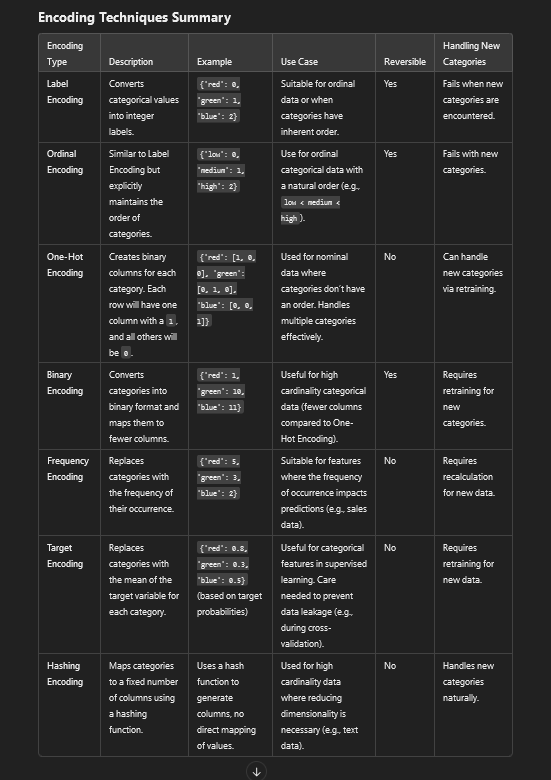